# Aprendizaje No Supervisado

## Transformación

A diferencia del Aprendizaje Supervisado, los algortimos No Supervisados no requieren o consideran variables objetivo.  La reducción de dimensionalidad, aprendizaje de variedades y extracción de características, encuentran una representación de los datos de entrada.

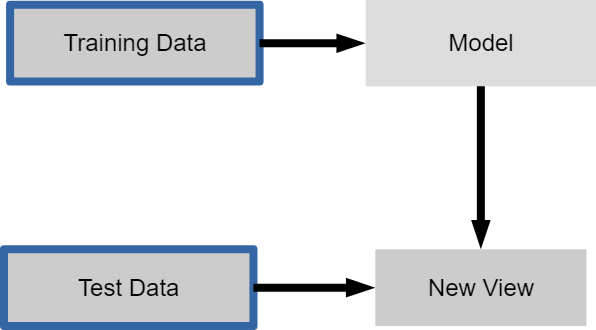

### Reescalado de Datos - Estandarización

Los datos se reescalan para que cada caracterísitca esté centrada en cero (media=0) y varianza unitaria (desviación estándar = 1). Es requisito en muchos algortimos de Machine Learning y es más un método de preprocesameinto de datos.

Si se tiene un dataset de una dimensión con los datos [1, 2, 3, 4, 5], los valores estandarizados serian:

|   1  |    2 |  3  |   4  |   5  |
| -----|:-----|:---:|-----:|-----:|
| -1.41 | -0.71 | 0.0 | 0.71 | 1.41 | 

Que se obtienen de la ecuación $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$ donde $\mu$ es la media muestral y $\sigma$ la desviación estándar.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
array = np.array( [1, 2, 3, 4, 5] )
array_estandarizado = (array - array.mean())/array.std()
print(f"Array Estandarizado: {array_estandarizado}")

Array Estandarizado: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


**Scikit-learn** contiene una clase para realizar el cálculo anterior denominada **StandardScaler**. 

Los algoritmos de preprocesamiento se implementan de forma muy similar a los algortimos supervisados. Para este ejemplo se trabajará con **Transformer** y el dataset Iris rescalado.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


Los datos en el dataset de Iris no están centrados (media != 0) y la deviación estándar para cada componente es diferente:

In [4]:
print(f"Media: {X_train.mean(axis=0)}")
print(f"Desviación Estándar: {X_train.std(axis=0)}")

Media: [5.88660714 3.05178571 3.79642857 1.22321429]
Desviación Estándar: [0.86741565 0.43424445 1.79264014 0.77793019]


Para preprocesar los datos, lo primero es importar el estimador **StandardScaler**.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Al igual que para la regresión y la clasificación, se llama al método **fit** para entrenar al modelo desde los datos. Al ser un estimador no supervisado, solo se ingresa **X**. Este estimador solo calcula la desviación estándar y la media.

In [6]:
scaler.fit(X_train)
print(f"Media: {scaler.mean_}")
print(f"Desviación Estándar: {scaler.scale_}")

Media: [5.88660714 3.05178571 3.79642857 1.22321429]
Desviación Estándar: [0.86741565 0.43424445 1.79264014 0.77793019]


Para reescalar los datos se aplica el método **transform**.

In [9]:
X_train_scaled = scaler.transform(X_train)

**X_train_scaled** tienes el mismo número de ejemplos y características, pero le media ha sido restada y todas las variables ahora tienen desviación estándar unitaria:

In [10]:
print(X_train_scaled.shape)
print(f"Media: {X_train_scaled.mean(axis=0)}")
print(f"Desviación Estándar: {X_train_scaled.std(axis=0)}")

(112, 4)
Media: [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17 -3.66770106e-16]
Desviación Estándar: [1. 1. 1. 1.]


En resumen, el método **fit** ajusta el estimador a los datos proporcionados. Se calculan los parámetros (media y desviación estándar) y despúes con el método **transform** se encarga de tomas estos parámetros y reescalar los datos. 

La misma transformación se aplica a los datos de test, por lo cual, es posible que tanto la media como la desviación estándar no sean 0 y 1.

In [11]:
X_test_scaled = scaler.transform(X_test)
print(f"Media: {X_test_scaled.mean(axis=0)}")
print(f"Desviación Estándar: {X_test_scaled.std(axis=0)}")

Media: [-0.19692712  0.05042896 -0.08461917 -0.12117658]
Desviación Estándar: [0.77268842 1.00056442 0.92175903 0.89784396]


<div class="alert alert-danger">
    La transformación en Train y Test debe ser la misma.
</div>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['#0000aa', '#ff2020'])



def plot_relative_scaling():
    # make synthetic data
    X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
    # split it into training and test set
    X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
    # plot the training and test set
    fig, axes = plt.subplots(1, 3, figsize=(13, 4))
    axes[0].scatter(X_train[:, 0], X_train[:, 1],
                    c='b', label="conjunto de entrenamiento", s=60)
    axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                    c='r', label="conjunto de test", s=60)
    axes[0].legend(loc='upper left')
    axes[0].set_title("datos originales")

    # scale the data using MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # visualize the properly scaled data
    axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                    c='b', label="conjunto de entrenamiento", s=60)
    axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                    c='r', label="conjunto de test", s=60)
    axes[1].set_title("datos escalados")

    # rescale the test set separately, so that test set min is 0 and test set max is 1
    # DO NOT DO THIS! For illustration purposes only
    test_scaler = MinMaxScaler()
    test_scaler.fit(X_test)
    X_test_scaled_badly = test_scaler.transform(X_test)

    # visualize wrongly scaled data
    axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                    c='b', label="conjunto de entrenamiento", s=60)
    axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                    c='r', label="conjunto de test", s=60)
    axes[2].set_title("datos incorrectamente escalados")


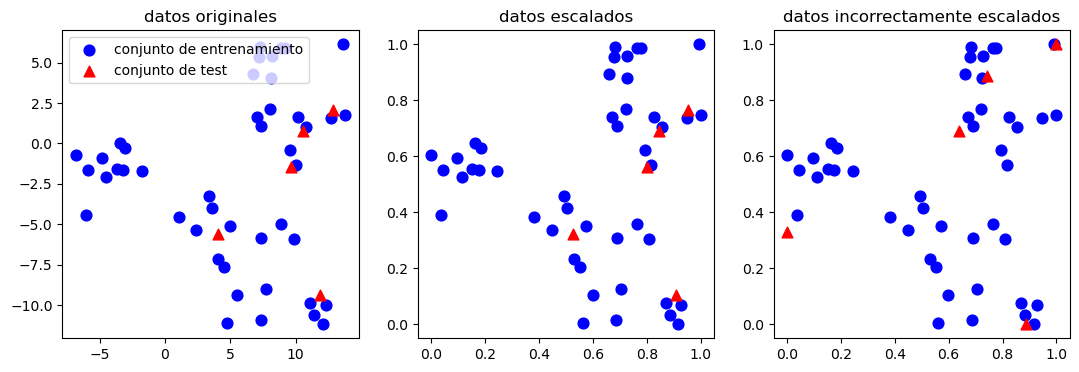

In [13]:
plot_relative_scaling()

Existen muchas formas de escalar datos, donde **StandardScaler** es la más común, pero existen otras como:

- **MinMaxScaler:** Reescala los datos para que se ajusten a un míinimo y a un máximo (normalmente entre 0 y 1).
- **RobustScaler:** Uso otros estadísticos más robustos como la mediana o los cuartiles.
- **Normalizer:** Normaliza cada ejemplo individualmente para que tenga como normal ([L1 o L2](https://www.iartificial.net/regularizacion-lasso-l1-ridge-l2-y-elasticnet/)) la unidad. Por defecto, se usa L2.    

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['#0000aa', '#ff2020'])


def plot_scaling():
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
    X += 3

    plt.figure(figsize=(15, 8))
    main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

    main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=60)
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()

    main_ax.set_xlim(-maxx + 1, maxx + 1)
    main_ax.set_ylim(-maxy + 1, maxy + 1)
    main_ax.set_title("Datos originales")
    other_axes = [plt.subplot2grid((2, 4), (i, j)) for j in range(2, 4) for i in range(2)]

    for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                       MinMaxScaler(), Normalizer(norm='l2')]):
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cm2, s=60)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)

    other_axes.append(main_ax)

    for ax in other_axes:
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

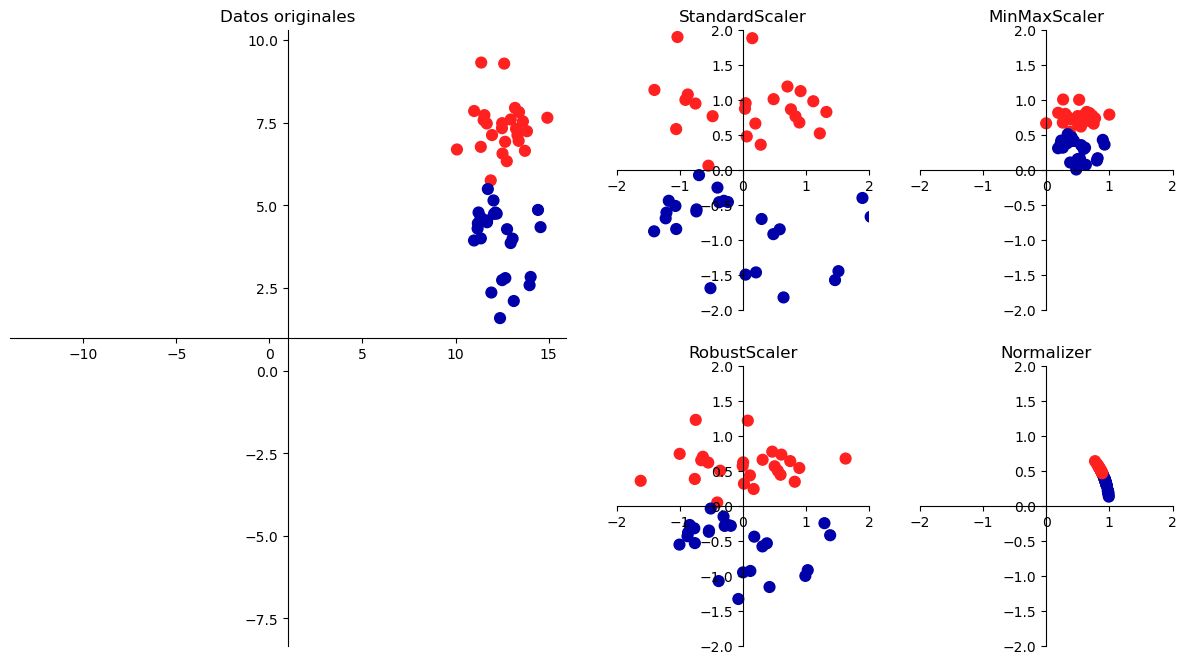

In [15]:
plot_scaling()


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


def plot_pca_illustration():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    S = X_pca.std(axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Datos originales")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[0].set_xlabel("característica 1")
    axes[0].set_ylabel("característica 2")
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].text(-1.5, -.5, "Componente 2", size=14)
    axes[0].text(-4, -4, "Componente 1", size=14)
    axes[0].set_aspect('equal')

    axes[1].set_title("Datos transformados")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("Primera componente principal")
    axes[1].set_ylabel("Segunda componente principal")
    axes[1].set_aspect('equal')
    axes[1].set_ylim(-8, 8)

    pca = PCA(n_components=1)
    pca.fit(X_blob)
    X_inverse = pca.inverse_transform(pca.transform(X_blob))

    axes[2].set_title("Datos transformados sin la segunda componente")
    axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[2].set_xlabel("Primera componente principal")
    axes[2].set_aspect('equal')
    axes[2].set_ylim(-8, 8)

    axes[3].set_title("Recuperación de los datos con una componente")
    axes[3].scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[3].set_xlabel("característica 1")
    axes[3].set_ylabel("característica 2")
    axes[3].set_aspect('equal')
    axes[3].set_xlim(-8, 4)
    axes[3].set_ylim(-8, 4)

### Análisis de componentes principales

**Principal Component Analysis, PCA**: Es una técnica para reducir la dimensionalidad de los datos creando una proyección lineal. Es decir, encontramos características nuevas para representar los datos que son una combinación lineal de los datos originales (lo cual es equivalente a rotar los datos). De esta forma, podemos pensar en el PCA como una proyección de nuestros datos en un nuevo espacio de características.

La forma en que el PCA encuentra estas nuevas direcciones es buscando direcciones de máxima varianza. Normalmente, solo unas pocas componentes principales son capaces de explicar la mayor parte de la varianza y el resto se pueden obviar. La premisa es reducir el tamaño (dimensionalidad) del dataset, al mismo tiempo que se captura la mayor parte de información. Hay muchas razones por las que es bueno reducir la dimensionalidad de un dataset: reducimos el coste computacional de los algoritmos de aprendizaje, reducimos el espacio en disco y ayudamos a combatir la llamada maldición de la dimensionalidad (curse of dimensionality).

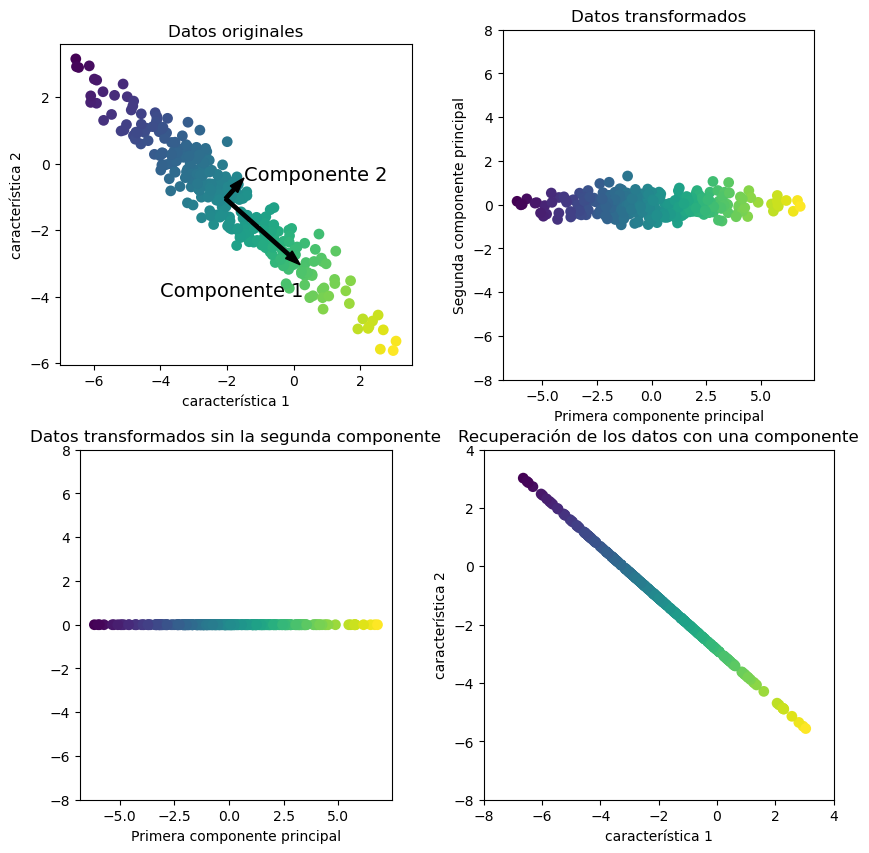

In [17]:
plot_pca_illustration()

Para entender mejor PCA se muestra un ejemplo en detalle:

[[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]]


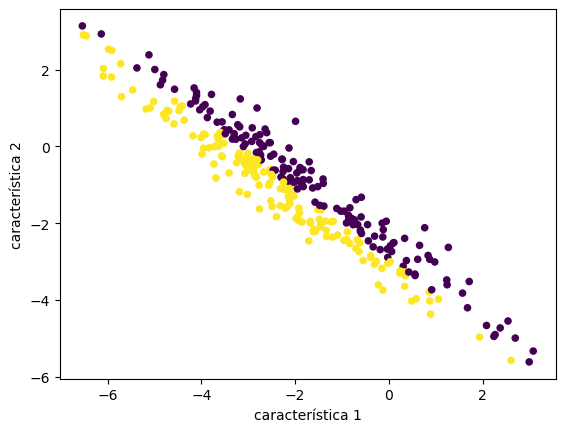

In [18]:
rnd = np.random.RandomState(5)
X_ =rnd.normal(size=(300,2))
print(X_[0:2,0:2])

X_blob = np.dot(X_, rnd.normal(size=(2,2))) + rnd.normal(size=2)
y = X_[:, 0] > 0

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("característica 1")
plt.ylabel("característica 2");

In [19]:
# Se crea la instancia de PCA
from sklearn.decomposition import PCA
pca = PCA()

In [20]:
# Se ajusta el PCA a los datos. Como PCA es un algortimo no supervisado, no hay que simunistrar y
pca.fit(X_blob)

PCA()

In [21]:
# Se transforman los datos proyectandolos sobre las componentes principales
X_pca = pca.transform(X_blob)

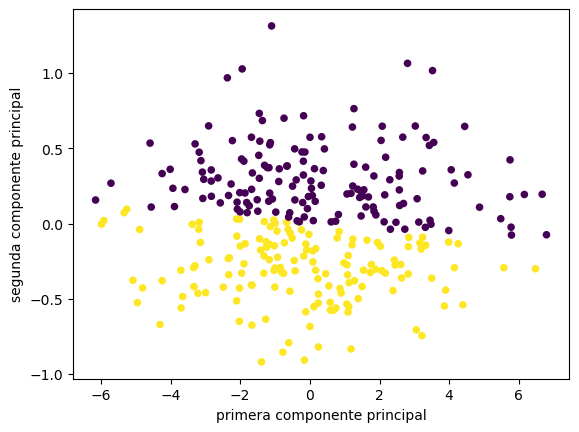

In [22]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("primera componente principal")
plt.ylabel("segunda componente principal");

In [23]:
# Ahora solo una componente principal
pca = PCA(n_components=1).fit(X_blob)

In [24]:
X_blob.shape

(300, 2)

In [25]:
X_pca = pca.transform(X_blob)
print(X_pca.shape)

(300, 1)


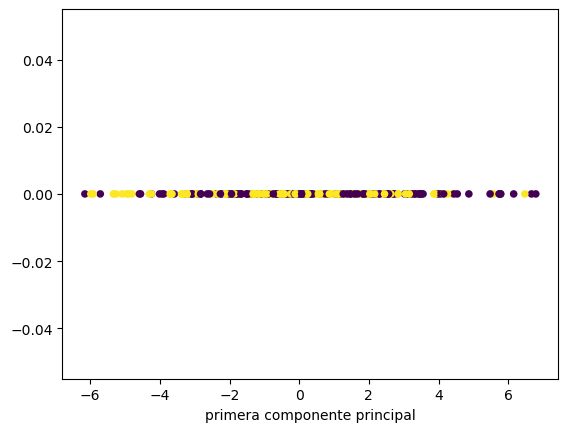

In [26]:
plt.scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=y, linewidths=0, s=30)
plt.xlabel("primera componente principal");

### Análisis del componente principal | PCA

[![Step Image](https://img.youtube.com/vi/s_Juv3vX9bo/0.jpg)](https://www.youtube.com/embed/s_Juv3vX9bo)
